<a href="https://colab.research.google.com/github/2016130714/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

In [ ]:
#parameter setting
amp = 1         #amplitude를 1로 설정하면, waveform의 범위가 -1부터 1까지다.
sr = 10000      #초당 10000개의 점을 찍겠다. Hz
dur = 0.5       # 0.5초의 waveform
freq = 100.0    # 1초에 100번의 주기를 돌겠다. Hz

In [ ]:
#sin함수를 만들 건데, sin()의 괄호에는 각도 값이 radian으로 들어간다. 즉 2파이(=360도)와 같은 값이 들어감
#이 radian값을 theta변수로 지정
#theta값만 만들면 sine wave를 만들 순 있으나, 이것은 현실이 반영되지 않은 것.(시간의 개념이 지정되지 않은 sine wave) 
#각 시간에 각 theta를 연결해야 함. 

In [ ]:
#generate time
t = np.arange(1, sr * dur+1)/sr     #1에서 sr*dur = 5000까지의 숫자를 생성. [1/sr초, 2/sr초, .... 5000/sr초]

In [ ]:
#generate time
theta = t * 2*np.pi *freq     #각 시간에 2pi(=360도)를 곱함. 이것이 한 주기. 이를 frequency만큼 곱하면 1초가 됨

In [ ]:
s = amp * np.sin(theta)     #sin으로 phasor를 만들었기 때문에, 실수만 다룬다.

Text(0, 0.5, 'real')

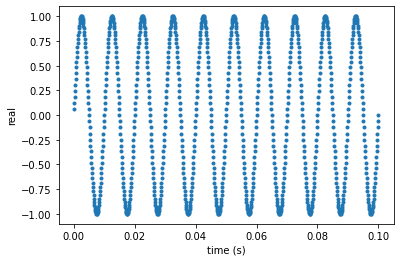

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)       #그림의 크기 결정. 111 중 각 숫자는 그 숫자만큼 분할한다는 의미.
#즉 111이 가장 큰 그래프고 211 이런 식으로 쓸 수록 작아짐.
ax.plot(t[0:1000], s[0:1000], '.')    #x축에 시간(t), y축에 sine 함수 값(s) plot. 0-1000까지 0.1초를 plot한 것
ax.set_xlabel('time (s)')   #x축 label에 time(s)를 썼으나, 이는 sine이 아닌 시간 값임.
ax.set_ylabel('real')
#시험: ax.plot(t, s, '.')면 몇 개의 점을 찍는 것?: 5000개 (t와 s의 점 개수는 동일해야 함.)

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
#이제 sine 대신에 e^theta*i라는 개념을 사용할 것이다. 이를 통해 a+bi의 복소수 개념 표현 가능
#실수는 수직선 상에 그냥 표시 가능하다. 복소수는 어떻게 그래프로 표현할까? -> i의 축을 만들면 된다.
#x축은 a(1, 2, 3, 4...), y축은 bi의 축(i, 2i, 3i, 4i...)를 할당하면 된다. 이를 (a, b)의 좌표료 표시.

In [ ]:
#기존의 np.sin(theta)를 np.exp(theta*1j)로 바꾼다.

In [ ]:
#theta = np.pi*0     #0, 90, 180, 270, 360의 theta값을 넣어보자. (0, pi/2, pi, 3pi/2, 2pi)
c = amp * np.exp(theta*1j)      #각각 1+0j, 0+j, -1+0j, 0-j가 나온다.
#이는 x축이 실수, y축이 i축일 때, (1, 0), (0, 1) (-1, 0) (0, -1)의 좌표다. 즉 반지름이 1인 원이다.

Text(0.5, 0, 'imag')

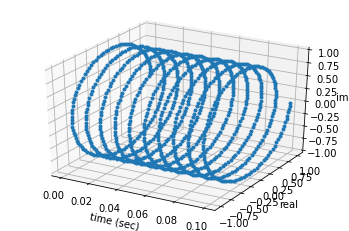

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')     #x축: 시간 y축: real z축: imaginary
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
ipd.Audio(c.imag, rate = sr)

In [ ]:
#sine phasor를 만드는 함수
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi *freq
  s = amp * np.sin(theta)

  return s, t, theta

In [ ]:
#해당 함수를 통해 간편하게 소리를 만들 수 있다
amp = 1; sr = 10000; dur = 1; freq = 300
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate = sr)

In [ ]:
#complex phasor를 만드는 함수
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)    #c.imag. 허수부로 만든 소리.

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.real, rate=sr)      #c.real. 실수부로 만든 소리. (허수부와 같은 소리다.)

#Generate pulse train(=source)

In [ ]:
#for loop를 통해, 여러 개의 sine wave를 만든다. frequency를 바꿔가며, 여러 freq의 sine wave를 여러 개 만든다.


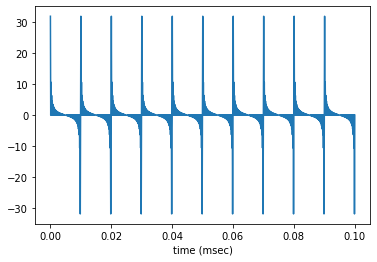

In [ ]:
#parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100      #기본 주파수(complex tone의 주파수)
Fend = int(sr/2)    #Nyquist frequency: 최대로 표현할 수 있는 주파수. 이는 sr/2다!

s_all = 0
for freq in range(F0, Fend+1, F0):  
#F0 = 100부터, F1 = 200, Fend = 5000까지 표현. 간격을 F0으로 하여, harmonics를 이룸.
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s    #phasor_sine 함수로 만든 sine wave를 누적하여 합침. (s+s+s+....)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

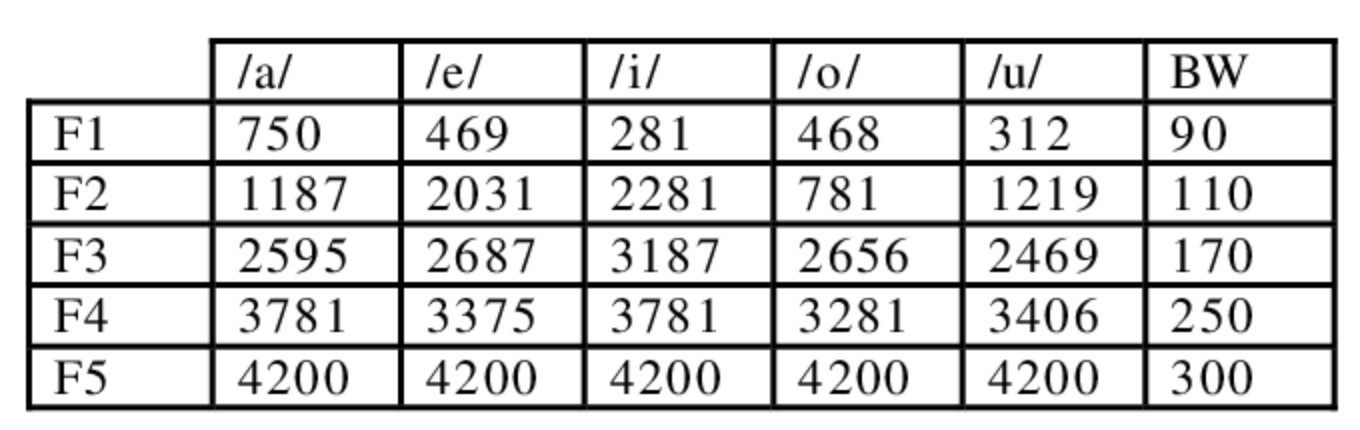

In [ ]:
#이 함수에 대해 배우진 않고, 사용만 하겠다.
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
s = s_all

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
#RG: 산맥의 위치. 첫번째: 0Hz에 산맥
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
#BW
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#이 과정을 거치면, frequency에 관계 없이 amp가 동일하던 pulse train에서, amp가 gradually decrease하게 한다.
#즉, 사람의 목소리에 좀더 가깝게 한다.

In [ ]:
#위의 표에 근거하여, /u/의 F1를 만듦. 아래 코드들은 각각 F2, F3, F4를 만든다. 
#즉, 점점 /u/에 유사한 소리가 된다.
RG = 312  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1219  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2469  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3406  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
#입술의 증폭 현상을 구현.
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)
#여기까지, 하나의 모음을 만드는 과정이다.